## **Metode Simpson 1/3 segmen berganda**

$ \int_{a}^{b} f(x) dx = \frac{h}{3} [f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + ... + 4f(x_{n-1}) + f(x_n)] $

### **Contoh**

$ f(x) = 2x^5 - x^4 + 3x^2 - 1800$
- batas atas = 2
- batas bawah = 14

carilah hasil fungsi berikut dengan metode simpson 1/3
- $ f(2) $
- $ f(4) $
- $ f(6) $
- $ f(8) $
- $ f(10) $
- $ f(12) $
- $ f(14) $


In [ ]:
%pip install numpy matplotlib tabulate

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x):
    return 2*x**5 - x**4 + 3*x**2 - 1800

x_values = np.array([2, 4, 6, 8, 10,12, 14])
f_values = f(x_values)

h = (x_values[-1] - x_values[0]) / 6  # 4 segmen

# Simpson 1/3 Rule
simpson_integral = (h / 3) * (
    f_values[0] +
    4 * f_values[1] +
    2 * f_values[2] +
    4 * f_values[3] +
    2 * f_values[4] +
    4 * f_values[5] +
    f_values[6]
)

def integral_exact(x):
    return (2/6)*x**6 - (1/5)*x**5 + (3/3)*x**3 - 1800*x

exact_integral = integral_exact(14) - integral_exact(2)
error = abs((simpson_integral - exact_integral)/ exact_integral)  * 100

# Tabel hasil
table_data = [
    ["x", "f(x)"],
    *[[x, fx] for x, fx in zip(x_values, f_values)],
    ["", ""],
    ["Luas (Simpson 1/3)", f"{simpson_integral:.2f}"],
    ["Luas (Eksak)", f"{exact_integral:.2f}"],
    ["Error (%)", f"{error:.3f}%"]
]

print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤════════════╕
│ x                  │ f(x)       │
╞════════════════════╪════════════╡
│ 2                  │ -1740      │
├────────────────────┼────────────┤
│ 4                  │ 40         │
├────────────────────┼────────────┤
│ 6                  │ 12564      │
├────────────────────┼────────────┤
│ 8                  │ 59832      │
├────────────────────┼────────────┤
│ 10                 │ 188500     │
├────────────────────┼────────────┤
│ 12                 │ 475560     │
├────────────────────┼────────────┤
│ 14                 │ 1036020    │
├────────────────────┼────────────┤
│                    │            │
├────────────────────┼────────────┤
│ Luas (Simpson 1/3) │ 2385424.00 │
├────────────────────┼────────────┤
│ Luas (Eksak)       │ 2383401.60 │
├────────────────────┼────────────┤
│ Error (%)          │ 0.085%     │
╘════════════════════╧════════════╛


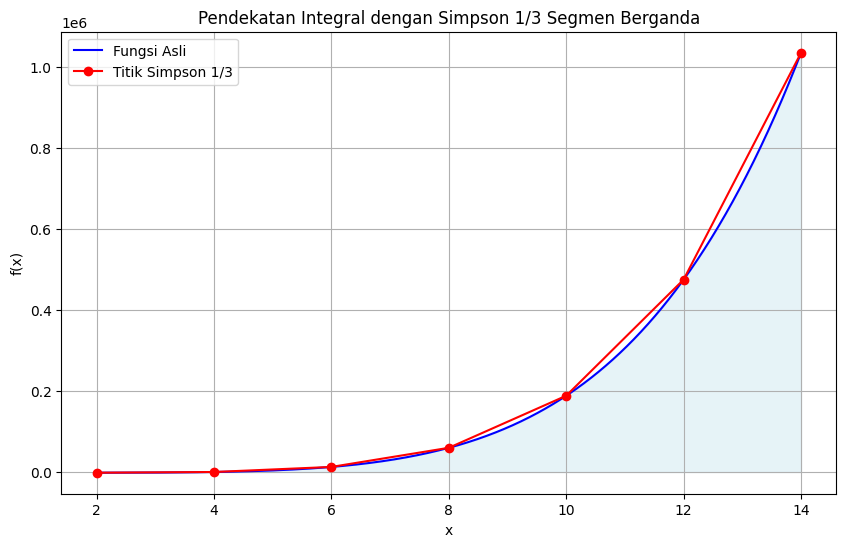

In [8]:
# Plot fungsi asli dan titik-titik pendekatan
x_plot = np.linspace(2, 14, 1000)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Fungsi Asli", color="blue")
plt.plot(x_values, f_values, 'ro-', label="Titik Simpson 1/3")
plt.fill_between(x_plot, y_plot, where=[(2 <= x <= 14) for x in x_plot], color='lightblue', alpha=0.3)
plt.title("Pendekatan Integral dengan Simpson 1/3 Segmen Berganda")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
